#### This is the same dataset I had earlier used with ML algorithms to predict whether the text is offensive or not. You can check the notebook here

https://www.kaggle.com/code/figolm10/offensive-words-classifier-and-eda?kernelSessionId=198743638

# 1) Importing Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

## Loading the dataset

In [3]:
df=pd.read_csv('/kaggle/input/english-profanity-words-dataset/English_profanity_words.csv')

#### Showing the first five rows of the dataset

In [4]:
df.head()

,is_offensive,text
0,0,Then go to the village pump and suggest they c...
1,1,ANTI GREEK NATIONALIS -WIKIPEDIA \n\nHi Alexik...
2,1,Dis hoe wasnt dis violent on Lottery Ticket 😂😂
3,0,It is better for Atabay not helping the banned...
4,0,"""is in CamelCase. """"SiCKO"""" is not CamelCase,..."


# 2) Data Preprocessing

In [5]:
df.shape

(184354, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184354 entries, 0 to 184353
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   is_offensive  184354 non-null  int64 
 1   text          184350 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.8+ MB


### Checking Null values

In [7]:
df.isnull().sum()

is_offensive    0
text            4
dtype: int64

### Deleting Null values

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

is_offensive    0
text            0
dtype: int64

### For this project we will use the first 25 thousand rows of this dataset

In [10]:
df=df[:25000]

In [11]:
df.head()

,is_offensive,text
0,0,Then go to the village pump and suggest they c...
1,1,ANTI GREEK NATIONALIS -WIKIPEDIA \n\nHi Alexik...
2,1,Dis hoe wasnt dis violent on Lottery Ticket 😂😂
3,0,It is better for Atabay not helping the banned...
4,0,"""is in CamelCase. """"SiCKO"""" is not CamelCase,..."


In [12]:
df.shape

(25000, 2)

# 3) Exploratory Data Analysis

## A) Distribution of Labeled Column

<Axes: xlabel='is_offensive', ylabel='count'>

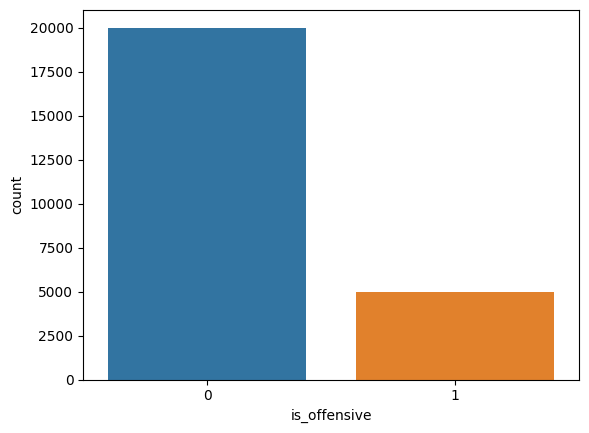

In [13]:
sn.countplot(x='is_offensive', data=df)

## B) Visualizing the Offensive and Non Offensive words with the help of WordCloud

In [14]:
from wordcloud import WordCloud

### i) Offensive Text

In [15]:
offensive_text=df[df['is_offensive']==1]['text']

offensive_text

1        ANTI GREEK NATIONALIS -WIKIPEDIA \n\nHi Alexik...
2           Dis hoe wasnt dis violent on Lottery Ticket 😂😂
8              Yo bag Gucci but you still ugly hoe shut up
21        I love my family, but I wouldn't even need wa...
23       "\n\n A kitten for you! \n\ndose this look lik...
                               ...                        
24971    I had 14 fags in the space ae 3 hours? Excuse ...
24978    fucking \n\nfaggot\n\nhopefully somone rapes o...
24983    You little stupid ass bitch I ain't fuckin wit...
24997                      This hoe taken by the world smh
24999    Bitches be trying to squash all beef wen they ...
Name: text, Length: 4998, dtype: object

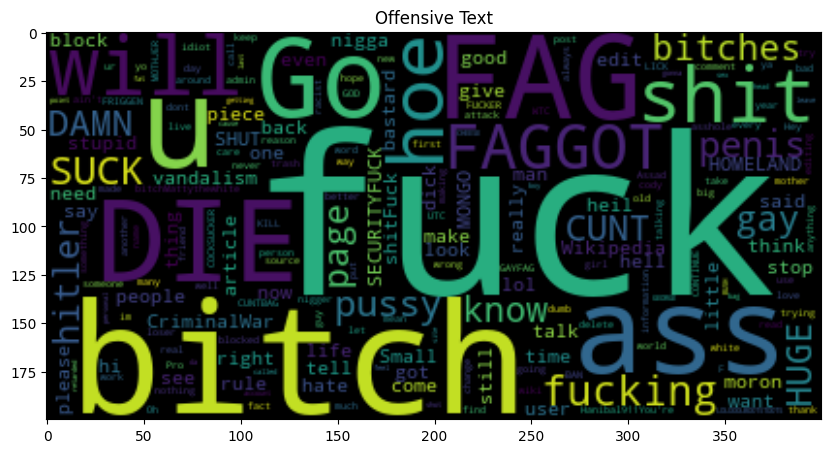

In [16]:
word_cloud=WordCloud(collocations=False, background_color='black').generate(" ".join(offensive_text))

plt.figure(figsize=(10,8))

plt.title("Offensive Text")
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

### ii) Normal Text

In [17]:
normal_text=df[df['is_offensive']==0]['text']

normal_text

0        Then go to the village pump and suggest they c...
3        It is better for Atabay not helping the banned...
4        "is in CamelCase.  ""SiCKO"" is not CamelCase,...
5        and  \n\nHi!  has Requested Arbitration with m...
6        Nonetheless lactose has a hemiacetal group whi...
                               ...                        
24993    Security and stuff\nYou wrote on Wikipedia:Tex...
24994    "\n\nCo-founder, anyone?\n\nI am curious as to...
24995    "Just to add Kansas Bear.When I said:\n\n""You...
24996    that's not a personal attack...I didn't refere...
24998    Take Some Time To Reflect \n\nTake some time t...
Name: text, Length: 20002, dtype: object

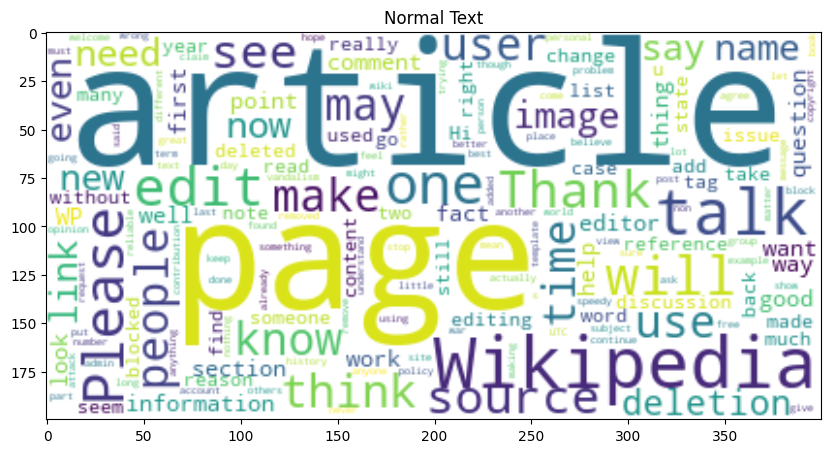

In [18]:
word_cloud=WordCloud(collocations=False, background_color='white').generate(" ".join(normal_text))

plt.figure(figsize=(10,8))

plt.title("Normal Text")
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

-------------

# 4) Data Cleaning Techniques

### Showing Sample texts

In [19]:
df['text'].iloc[0]

'Then go to the village pump and suggest they change the language in how a RFC should be set up.'

In [20]:
df['text'].iloc[700]

"Can't tell me shit, cuz ion care bitch."

-----------

## a) Deleting Unwanted Symbols and Numeric data

In [21]:
df['Processed_text']=df['text'].str.replace(r'[^a-zA-Z]', " ", regex=True)

In [22]:
df.head()

,is_offensive,text,Processed_text
0,0,Then go to the village pump and suggest they c...,Then go to the village pump and suggest they c...
1,1,ANTI GREEK NATIONALIS -WIKIPEDIA \n\nHi Alexik...,ANTI GREEK NATIONALIS WIKIPEDIA Hi Alexikou...
2,1,Dis hoe wasnt dis violent on Lottery Ticket 😂😂,Dis hoe wasnt dis violent on Lottery Ticket
3,0,It is better for Atabay not helping the banned...,It is better for Atabay not helping the banned...
4,0,"""is in CamelCase. """"SiCKO"""" is not CamelCase,...",is in CamelCase SiCKO is not CamelCase ...


In [23]:
df['Processed_text'].iloc[0]

'Then go to the village pump and suggest they change the language in how a RFC should be set up '

In [24]:
df['Processed_text'].iloc[700]

'Can t tell me shit  cuz ion care bitch '

---------------

## b) Removing Spaces and Handling unwanted Spaces

In [25]:
df['Processed_text_2']=df['Processed_text'].str.replace(r'[\s]+', ' ', regex=True)

In [26]:
df.head()

,is_offensive,text,Processed_text,Processed_text_2
0,0,Then go to the village pump and suggest they c...,Then go to the village pump and suggest they c...,Then go to the village pump and suggest they c...
1,1,ANTI GREEK NATIONALIS -WIKIPEDIA \n\nHi Alexik...,ANTI GREEK NATIONALIS WIKIPEDIA Hi Alexikou...,ANTI GREEK NATIONALIS WIKIPEDIA Hi Alexikoua Y...
2,1,Dis hoe wasnt dis violent on Lottery Ticket 😂😂,Dis hoe wasnt dis violent on Lottery Ticket,Dis hoe wasnt dis violent on Lottery Ticket
3,0,It is better for Atabay not helping the banned...,It is better for Atabay not helping the banned...,It is better for Atabay not helping the banned...
4,0,"""is in CamelCase. """"SiCKO"""" is not CamelCase,...",is in CamelCase SiCKO is not CamelCase ...,is in CamelCase SiCKO is not CamelCase so the...


In [27]:
df['Processed_text_2'].iloc[0]

'Then go to the village pump and suggest they change the language in how a RFC should be set up '

In [28]:
df['Processed_text_2'].iloc[700]

'Can t tell me shit cuz ion care bitch '

---------

## c) Deleting Unwanted Columns

In [29]:
df.drop(columns=['text', 'Processed_text'], axis=1, inplace=True)

In [30]:
df.head()

,is_offensive,Processed_text_2
0,0,Then go to the village pump and suggest they c...
1,1,ANTI GREEK NATIONALIS WIKIPEDIA Hi Alexikoua Y...
2,1,Dis hoe wasnt dis violent on Lottery Ticket
3,0,It is better for Atabay not helping the banned...
4,0,is in CamelCase SiCKO is not CamelCase so the...


----------

# 5) NLP

### We are using Spacy Here.

In [31]:
import spacy

In [32]:
nlp=spacy.load('en_core_web_sm')

----------

## a) Lemmatization

In [33]:
def lemmatization(text):
    doc=nlp(text)
    
    lemmalist=[word.lemma_ for word in doc]
    
    return ' '.join(lemmalist)

In [34]:
df['lemma_text']=df['Processed_text_2'].apply(lemmatization)

In [35]:
df.head()

,is_offensive,Processed_text_2,lemma_text
0,0,Then go to the village pump and suggest they c...,then go to the village pump and suggest they c...
1,1,ANTI GREEK NATIONALIS WIKIPEDIA Hi Alexikoua Y...,ANTI greek NATIONALIS WIKIPEDIA hi Alexikoua Y...
2,1,Dis hoe wasnt dis violent on Lottery Ticket,Dis hoe be not dis violent on Lottery ticket
3,0,It is better for Atabay not helping the banned...,it be well for Atabay not help the ban vandal ...
4,0,is in CamelCase SiCKO is not CamelCase so the...,be in CamelCase SiCKO be not CamelCase so th...


In [36]:
df['Processed_text_2'].iloc[3]

'It is better for Atabay not helping the banned vandals pushing their POV '

In [37]:
df['lemma_text'].iloc[3]

'it be well for Atabay not help the ban vandal push their pov'

------------

## b) Removing the Stopwords

In [38]:
def remove_stopwords(text):
    
    doc=nlp(text)
    
    no_stopwords_list=[ word.text for word in doc if not word.is_stop]
    
    return ' '.join(no_stopwords_list)

In [39]:
df['final_text']=df['lemma_text'].apply(remove_stopwords)

In [40]:
df.head()

,is_offensive,Processed_text_2,lemma_text,final_text
0,0,Then go to the village pump and suggest they c...,then go to the village pump and suggest they c...,village pump suggest change language RFC set
1,1,ANTI GREEK NATIONALIS WIKIPEDIA Hi Alexikoua Y...,ANTI greek NATIONALIS WIKIPEDIA hi Alexikoua Y...,ANTI greek NATIONALIS WIKIPEDIA hi Alexikoua Y...
2,1,Dis hoe wasnt dis violent on Lottery Ticket,Dis hoe be not dis violent on Lottery ticket,Dis hoe dis violent Lottery ticket
3,0,It is better for Atabay not helping the banned...,it be well for Atabay not help the ban vandal ...,Atabay help ban vandal push pov
4,0,is in CamelCase SiCKO is not CamelCase so the...,be in CamelCase SiCKO be not CamelCase so th...,CamelCase SiCKO CamelCase CamelCase rule r ...


In [41]:
df['lemma_text'].iloc[3]

'it be well for Atabay not help the ban vandal push their pov'

In [42]:
df['final_text'].iloc[3]

'Atabay help ban vandal push pov'

--------

#  6) One Hot Representation

In [43]:
from tensorflow.keras.preprocessing.text import one_hot

In [44]:
vocab_size=10000

one_hot_representation=[ one_hot(words, vocab_size) for words in df['final_text']]

In [45]:
df['final_text'].iloc[0]

'village pump suggest change language RFC set'

In [46]:
one_hot_representation[0]

[4918, 63, 5745, 6321, 7472, 3900, 2687]

In [47]:
for i in range(0,4):
    print(df['final_text'].iloc[i])

village pump suggest change language RFC set
ANTI greek NATIONALIS WIKIPEDIA hi Alexikoua Yous vandalise Wikipedia edit false information chauvinist edit false information Wikipedia percent greek Albania real information census vandalise WIKIPEDIA militant idea
Dis hoe dis violent Lottery ticket
Atabay help ban vandal push pov


In [48]:
for i in range(0,4):
    print(one_hot_representation[i])

[4918, 63, 5745, 6321, 7472, 3900, 2687]
[5267, 2707, 1626, 9797, 6847, 8366, 3160, 6466, 9797, 5004, 259, 8666, 2044, 5004, 259, 8666, 9797, 5597, 2707, 6699, 8765, 8666, 8969, 6466, 9797, 6246, 5684]
[251, 9433, 251, 3212, 9526, 9921]
[1581, 320, 6805, 8829, 3507, 6002]


----------

# 7) Padding

In [49]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [50]:
sentence_length=20

embedded_tweet= pad_sequences(one_hot_representation, padding='pre', maxlen=sentence_length)

In [51]:
for i in range(0,4):
    print(df['final_text'].iloc[i])

village pump suggest change language RFC set
ANTI greek NATIONALIS WIKIPEDIA hi Alexikoua Yous vandalise Wikipedia edit false information chauvinist edit false information Wikipedia percent greek Albania real information census vandalise WIKIPEDIA militant idea
Dis hoe dis violent Lottery ticket
Atabay help ban vandal push pov


In [52]:
for i in range(0,4):
    print(embedded_tweet[i])

[   0    0    0    0    0    0    0    0    0    0    0    0    0 4918
   63 5745 6321 7472 3900 2687]
[6466 9797 5004  259 8666 2044 5004  259 8666 9797 5597 2707 6699 8765
 8666 8969 6466 9797 6246 5684]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
  251 9433  251 3212 9526 9921]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
 1581  320 6805 8829 3507 6002]


-----------------

# 8) Converting Columns into numpy array

In [54]:
X=np.array(embedded_tweet)
Y=np.array(df['is_offensive'])

--------

# Showing the Distribution of the Labeled Column

In [56]:
df['is_offensive'].value_counts()

is_offensive
0    20002
1     4998
Name: count, dtype: int64

-------

# 9) Balancing our dataset using SMOTE

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
smote=SMOTE(sampling_strategy='minority')

X,Y=smote.fit_resample(X,Y)

--------

# 10) Train Test Split

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)

In [61]:
print(X.shape, X_train.shape, X_test.shape)

(40004, 20) (32003, 20) (8001, 20)


-----------

# 11) LSTM Model

In [62]:
import tensorflow as tf
from tensorflow import keras

## a) Building the Model

In [63]:
dimention=50

model=keras.Sequential([
    
    # Embedding Layer
    keras.layers.Embedding(vocab_size, dimention, input_length=sentence_length),
    
    # LSTM Layer
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.LSTM(50, return_sequences=True),
    keras.layers.LSTM(50),
    
    # Dense Layer
    keras.layers.Dense(1, activation='sigmoid')

])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## b) Compiling the Model

In [65]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## c) Fitting the Model

In [66]:
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8499 - loss: 0.3454
Epoch 2/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9571 - loss: 0.1238
Epoch 3/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9747 - loss: 0.0762
Epoch 4/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9849 - loss: 0.0458
Epoch 5/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9917 - loss: 0.0269
Epoch 6/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9947 - loss: 0.0172
Epoch 7/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9967 - loss: 0.0100
Epoch 8/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9981 - loss: 0.0062
Epoch 9/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9983 - loss: 0.0051
Epoch 10/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9990 - loss: 0.0032


## d) Model Evaluation

In [67]:
loss, accuracy=model.evaluate(X_test, Y_test)

print("Model Accuracy: ", accuracy)

251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9199 - loss: 0.5274
Model Accuracy:  0.9176353216171265


#### So, our Testing Accuracy is 89%, which is good.

-----------

# 12) Prediction

In [103]:
pred=model.predict(X_test)

251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [104]:
y_pred_binary=(y_pred>0.5).astype(int)

In [105]:
Y_test[:5]

array([0, 0, 1, 1, 1])

In [106]:
y_pred_binary[:5]

array([[0],
       [0],
       [1],
       [1],
       [1]])

---------

# 13) Confusion Matrix and Classification Report

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3965
           1       0.92      0.92      0.92      4036

    accuracy                           0.92      8001
   macro avg       0.92      0.92      0.92      8001
weighted avg       0.92      0.92      0.92      8001



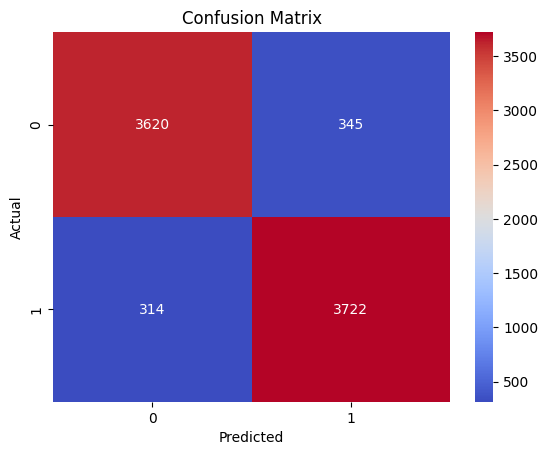

In [102]:
# Classification Report
print("Classification Report:")
print(classification_report(Y_test, y_pred_binary))


print("=======================================================================")
# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_binary)

# Plotting Confusion Matrix
sn.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

------------